<a href="https://colab.research.google.com/github/miles-garcia/DSPS_MGarcia/blob/main/P661_HW3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Created by FedericaBBianco @fedhere for DSPS/MLNPS
# Kolmogorov Smirnoff test, application to earthquake data

In [108]:
#all the imports I needed
from __future__ import print_function, division
import pandas as pd
import pylab as pl
import scipy as sp
from scipy import stats
%pylab inline
#pl.style.use("https://raw.githubusercontent.com/fedhere/DSPS/master/fbb.mplstyle") #this was giving me an error so i just remove it

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.10/dist-packages/IPython/core/magics/pylab.py:159: UserWarning: pylab import has clobbered these variables: ['datetime']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


This homework asks you to reproduce the work in [Corral 2018](https://arxiv.org/pdf/0910.0055.pdf) which is well described, but not "reproducible".
Corral 2018 uses a K-S test to show that at different magnitude scales the time gaps between earthquakes follows the same distribution. If true, this indicates that there is a consistent scaling law.

The argument is a little convoluted, but it is a somewhat innovative use of the test. Corall compares the time gap between earthquakes  greater than a certain magnitude threshold with the time gaps between earthquakes above a different threshold, and finds no differences.

Remind yourself exactly what the K-S test is about :

    1 What is the test's Null Hypothsis that the K-S test tests?
    
    


The two data sets you're testing/comparing come from the SAME underlying distribution.

    2 What is the "statistic" or "pivotal quantity" that the test uses?
    


The maximum difference between the cumulative distributions of the two data sets.

    3 What does the probability distribution of this statistic depend on?
    
   


The size of the data set(s).

# Data Retrival

The first reason why the paper is not techincally _reproducible_ is that, while a link is provided to retrieve the data, the link is dead. This happens often. Services like [Zenodo](https://zenodo.org/) or journals that serve data provide some insurance against this but unfortunately the standards are not strict.

You can retrieve the data yourself from [this website](http://service.scedc.caltech.edu/eq-catalogs/poly.php). Think about what setting up data like this means for reproducibility. Did the author comply to reproducibility standards?__ Make sure the number of entries in your final dataset is similar to that of the authors. I got 70798, instead of 77000. 10% off, which I deem close enough. You should get something similar. Use the map in the paper to determine the region of interest. Call the file earthquakes_\<firstinitialLastname\>.csv and upload it to your github repository. Read it your file, instead of mine as instructed below. If you are getting weird results compare to what I got, go back and check how the files differ.

# Data Ingestion

## read in data

I saved the data in a file called "earthquakes.csv", where ```csv``` stands for "comma separated file". [This file format](https://www.howtogeek.com/348960/what-is-a-csv-file-and-how-do-i-open-it/) requires different entries in a row to be separated by commas alone (no space) and for commas to be used in quote if they are not intended to separate entries.

```
a,b,c
d,e,f
g,"h,2",i
```
The data is uploaded on the  github homework repository but to read it in you will need to get the link to the *raw file*: the link to the file earthquakes.csv which is in my GitHub repository https://github.com/fedhere/MLPNS2021/tree/main/HW2_NHRT takes you to an ```html``` page that includes the content of the file, but you want to isolate the content of the file itself: the _raw file_. Pay attention to this: from the next time I will not give you the exact link, I will just point you to the file and you will have to find the link to the raw data from there. (remember to use the "raw" link)

The data can be read effectively using the _pandas_ python package as ```pandas.read_csv(<file name or URL>)```.

However, I did not format the data correctly, according to the csv extension requirement. This happens all the time. Look at the file and use the pandas documentation to figure out how to read it with ```pd.read_csv()```

In [109]:
#from google.colab import drive

#drive.mount('/content/drive')

In [110]:
df = pd.read_csv('https://raw.githubusercontent.com/miles-garcia/DSPS_MGarcia/main/Homeworks/HW3/earthquakes_MGarcia.txt',sep=' ',skipinitialspace=True)

In [111]:
df

,#YYY/MM/DD,HH:mm:SS.ss,ET,GT,MAG,M,LAT,LON,DEPTH,Q,EVID,NPH,NGRM
0,1984/01/01,01:30:57.52,eq,l,2.02,c,33.24600,-116.43300,1.6,C,28255,13,17
1,1984/01/01,05:31:34.16,eq,l,2.12,c,32.94500,-116.29500,5.4,C,28259,18,42
2,1984/01/01,06:59:05.14,eq,l,2.43,c,33.34300,-117.62800,5.6,C,28260,13,30
3,1984/01/01,11:10:25.29,eq,l,2.07,c,33.66800,-116.78000,13.8,C,28270,19,40
4,1984/01/01,13:50:47.62,eq,l,2.25,c,35.94400,-118.32200,-1.4,C,28546,29,56
...,...,...,...,...,...,...,...,...,...,...,...,...,...
77950,2002/12/31,06:15:19.97,eq,l,2.15,l,34.00350,-116.39317,10.3,A,9875101,91,572
77951,2002/12/31,11:34:28.03,eq,l,2.14,l,32.25667,-115.82533,6.8,C,9875125,23,118
77952,2002/12/31,21:59:58.92,eq,l,2.18,l,33.18617,-115.61100,1.7,A,9875225,39,225
77953,2002/12/31,22:48:19.60,eq,l,2.70,l,31.75567,-116.65500,5.3,C,9875233,27,342


running the following lines of code should give you the same result as mine if you used the file I provided (467 students), and qualitatively  similar if you are using your own data (667 students)

In [112]:
df.shape

(77955, 13)

In [113]:
df.head()

,#YYY/MM/DD,HH:mm:SS.ss,ET,GT,MAG,M,LAT,LON,DEPTH,Q,EVID,NPH,NGRM
0,1984/01/01,01:30:57.52,eq,l,2.02,c,33.246,-116.433,1.6,C,28255,13,17
1,1984/01/01,05:31:34.16,eq,l,2.12,c,32.945,-116.295,5.4,C,28259,18,42
2,1984/01/01,06:59:05.14,eq,l,2.43,c,33.343,-117.628,5.6,C,28260,13,30
3,1984/01/01,11:10:25.29,eq,l,2.07,c,33.668,-116.780,13.8,C,28270,19,40
4,1984/01/01,13:50:47.62,eq,l,2.25,c,35.944,-118.322,-1.4,C,28546,29,56


In [114]:
df.describe()

,MAG,LAT,LON,DEPTH,EVID,NPH,NGRM
count,77955.000000,77955.000000,77955.000000,77955.000000,7.795500e+04,77955.000000,77955.000000
mean,2.423602,34.043113,-116.879284,5.112988,3.778819e+06,30.751446,180.812251
std,0.411654,1.142951,1.052388,4.115084,3.462785e+06,22.101140,228.944081
min,2.000000,30.094830,-121.760000,-2.100000,2.825500e+04,0.000000,0.000000
25%,2.130000,33.189000,-117.656000,2.200000,7.446010e+05,16.000000,61.000000
50%,2.310000,34.121000,-116.587000,5.000000,3.054507e+06,25.000000,116.000000
75%,2.600000,34.617000,-116.273000,6.400000,7.045222e+06,39.000000,220.000000
max,7.300000,37.985500,-113.719000,29.300000,3.736673e+07,406.000000,3815.000000


now that you have a dataframe object you can use methods of the object to modify it. Use the method ```eqdata.rename``` to change the names of the 3 columns that are the only three relevant to us: _date, time, magnitude_

## prepare date-time column

In [115]:
df = df.rename(columns={"#YYY/MM/DD": "Date", "HH:mm:SS.ss": "Time","MAG":"Magnitude"})
df2 = df[["Date","Time","Magnitude"]]

In [116]:
df2.head()

,Date,Time,Magnitude
0,1984/01/01,01:30:57.52,2.02
1,1984/01/01,05:31:34.16,2.12
2,1984/01/01,06:59:05.14,2.43
3,1984/01/01,11:10:25.29,2.07
4,1984/01/01,13:50:47.62,2.25


In [117]:
df2.describe()

,Magnitude
count,77955.000000
mean,2.423602
std,0.411654
min,2.000000
25%,2.130000
50%,2.310000
75%,2.600000
max,7.300000


Now you want to combine the columns containing date and time and convert them to a "datetime" kind of data object.


What data type are the _time_ and _date_ columns right now? What type you want them to be to conver them to datetime with ```pd.datetime()```? type 'O' means object, typically a string.

In [118]:
df2.Time.dtype, df2.Date.dtype

(dtype('O'), dtype('O'))

to do this conversion I

   1. joined date and time into a single string for each row with a ["list comprehension"](https://www.pythonforbeginners.com/basics/list-comprehensions-in-python) (essentially a for loop but more efficient and compact). You do not have to do it with a list comprehension, you can use just a for loop.

   2. used pd.datetime() to convert the resulting new dataframe column into a dataframe column containing _datetime_ objects (see lab)

   3. but this did not work because of the formatting of some dates, so I had to go back and fix 5 entries. (you are on your own to figure out this one)

In [119]:
datetime = [df2["Date"][i]+" "+df2["Time"][i] for i in range(len(df2["Date"]))]
df2["Datetime"] = datetime
df2.head()

<ipython-input-119-2c47e48cea2b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["Datetime"] = datetime


,Date,Time,Magnitude,Datetime
0,1984/01/01,01:30:57.52,2.02,1984/01/01 01:30:57.52
1,1984/01/01,05:31:34.16,2.12,1984/01/01 05:31:34.16
2,1984/01/01,06:59:05.14,2.43,1984/01/01 06:59:05.14
3,1984/01/01,11:10:25.29,2.07,1984/01/01 11:10:25.29
4,1984/01/01,13:50:47.62,2.25,1984/01/01 13:50:47.62


In [120]:
df2["Datetime"][1852] = '1984/08/09 04:47:59.99'
df2["Datetime"][26038] = '1990/12/25 14:19:59.99'
df2["Datetime"][36459] = '1992/07/10 21:47:59.99'
df2["Datetime"][54873] = '1995/07/08 15:33:59.99'
df2["Datetime"][65086] = '1999/08/14 06:40:59.99'
df2["Datetime"][66431] = '1999/10/17 23:23:01.00'

<ipython-input-120-027a2eeeb748>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["Datetime"][1852] = '1984/08/09 04:47:59.99'
<ipython-input-120-027a2eeeb748>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["Datetime"][26038] = '1990/12/25 14:19:59.99'
<ipython-input-120-027a2eeeb748>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["Datetime"][36459] = '1992/07/10 21:47:59.99'
<ipython-input-120-027a2eeeb748>:4: SettingW

In [121]:
df2["Datetime"] = pd.to_datetime(df2["Datetime"],format='%Y/%m/%d %H:%M:%S.%f')

<ipython-input-121-001a2361c783>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["Datetime"] = pd.to_datetime(df2["Datetime"],format='%Y/%m/%d %H:%M:%S.%f')


In [122]:
df2.head()

,Date,Time,Magnitude,Datetime
0,1984/01/01,01:30:57.52,2.02,1984-01-01 01:30:57.520
1,1984/01/01,05:31:34.16,2.12,1984-01-01 05:31:34.160
2,1984/01/01,06:59:05.14,2.43,1984-01-01 06:59:05.140
3,1984/01/01,11:10:25.29,2.07,1984-01-01 11:10:25.290
4,1984/01/01,13:50:47.62,2.25,1984-01-01 13:50:47.620


In [123]:
df2.Datetime.dtype

dtype('<M8[ns]')

## select valuable data

Following the description in Section 2  of Corral 2018 I removed all data that did not belong to a "stationary" period. Third paragraph section 2 of Corral 2018. You can see the cell of code I used to do this [here](https://github.com/fedhere/DSPS/blob/master/HW3/Corral2018_selectStationary.py) at no points cost, cause it was a bit tricky, but I encourage you to try and do it yourself. If you can do it in fewer lines than I did its automatically +5 points (just turning the loop into a list comprehension does not count. That is an obvious way to decrease the number of lines of code; I did not do it simply to enhance readability.)

In [124]:
ss = [] #using Fed's code.

# loop through all year pairs as year and fraction of year
for t in [(1984, 1986.5),
          (1990.3, 1992.1),
          (1994.6, 1995.6),
          (1996.1,1996.5),
          (1997,1997.6),
          (1997.75,1998.15),
          (1998.25,1999.35),
          (2000.55,2000.8),
          (2000.9 ,2001.25),
          (2001.6 ,2002),
          (2002.5 ,2003)]:

    # for each pair I convert the year to datetime (easy)
    # then I convert the fraction of year and convert it to days and convert that to a delta-time
    # finally I add that deltatime to the year datetime.
    ss.append((pd.to_datetime(int(t[0]), format="%Y")
        + pd.Timedelta('%.f days'%((t[0] - int(t[0])) * 365.25)),
               pd.to_datetime(int(t[1]), format="%Y")
        + pd.Timedelta('%.f days'%((t[1] - int(t[1])) * 365.25))))


############

print ("the {} timestamp pairs that are the boundaries of good data periods are:".format(len(ss)))


############

# data between start and end of first time period
gooddates = (((df2.Datetime >= ss[0][0]) * (df2.Datetime <= ss[0][1])) +\
        # data between start and end of second time period
        ((df2.Datetime >=ss [1][0]) * (df2.Datetime <= ss[1][1])) +\
        ((df2.Datetime >=ss [2][0]) * (df2.Datetime <= ss[2][1])) +\
        ((df2.Datetime >=ss [3][0]) * (df2.Datetime <= ss[3][1])) +\
        ((df2.Datetime >=ss [4][0]) * (df2.Datetime <= ss[4][1])) +\
        ((df2.Datetime >=ss [5][0]) * (df2.Datetime <= ss[5][1])) +\
        ((df2.Datetime >=ss [6][0]) * (df2.Datetime <= ss[6][1])) +\
        ((df2.Datetime >=ss [7][0]) * (df2.Datetime <= ss[7][1])) +\
        ((df2.Datetime >=ss [8][0]) * (df2.Datetime <= ss[8][1])) +\
        ((df2.Datetime >=ss [9][0]) * (df2.Datetime <= ss[9][1])) +\
        # data between start and end of last time period
        ((df2.Datetime >=ss [10][0]) * (df2.Datetime <= ss[10][1])\
        ).values)
gooddates

the 11 timestamp pairs that are the boundaries of good data periods are:


0        True
1        True
2        True
3        True
4        True
         ... 
77950    True
77951    True
77952    True
77953    True
77954    True
Name: Datetime, Length: 77955, dtype: bool

In [125]:
print ("the {} timestamp pairs that are the boundaries of good data periods are:".format(len(ss)))


the 11 timestamp pairs that are the boundaries of good data periods are:


The following cell of code shows you the array of bool values (True/False) which I create to use as an index to the input array: when used as an index, a technique called "broadcasting" in python, will select only elements of the original array where the index array value is True. something like
Try:



In [126]:
a = np.array([0, 1, 2])
j =a[[True, False, True]]
j

array([0, 2])

For each of the 11 valid periods I create a condition
``` datetime >= period_start AND datetime <= period_end ``` where AND is a product of booleans: True * False = False.

I want to take all chinks of data that satisfy this condition for any of the 11 chunks of time so that is a logical OR operator, or a sum of Booleans: True + False = True

This is because ```True``` really corresponds to "not 0" and False to "0". So ```"not 0" * 0 = 0``` and ```"not 0" + 0 = not 0```
    

In [127]:
eqGoodData = df2[gooddates]

In [128]:
print ("there are {} earthquakes falling in the selected stationary periods".
       format(gooddates.sum()))

there are 19860 earthquakes falling in the selected stationary periods


In [129]:
eqGoodData.shape

(19860, 4)

In [130]:
eqGoodData.head()

,Date,Time,Magnitude,Datetime
0,1984/01/01,01:30:57.52,2.02,1984-01-01 01:30:57.520
1,1984/01/01,05:31:34.16,2.12,1984-01-01 05:31:34.160
2,1984/01/01,06:59:05.14,2.43,1984-01-01 06:59:05.140
3,1984/01/01,11:10:25.29,2.07,1984-01-01 11:10:25.290
4,1984/01/01,13:50:47.62,2.25,1984-01-01 13:50:47.620


Now what you really want is the _time interval between earthquakes_ for all events greater than some magnitude m, while all you have are the date and time of the events.:

You can remove earthquakes smaller than magnitude 2 by, again, broadcasting. How would that look like?

In [131]:
# I also selected M<2 so I'm not gonna need to do this.

In [132]:
eqGoodData.shape #look like for my data it was not needed! that is because I chose M>2 when when I downloaded the data

(19860, 4)

You can get the time between consecutive earthquakes with the method ```diff()``` of numpy arrays (in a pandas series you can get the data as a numpy array with the attribute .values: ```seried.values```).


In [133]:
gaps = diff(eqGoodData["Datetime"])
df_gap = pd.DataFrame(gaps,columns=["Gap"],dtype=int)

In [134]:
eqGoodData

,Date,Time,Magnitude,Datetime
0,1984/01/01,01:30:57.52,2.02,1984-01-01 01:30:57.520
1,1984/01/01,05:31:34.16,2.12,1984-01-01 05:31:34.160
2,1984/01/01,06:59:05.14,2.43,1984-01-01 06:59:05.140
3,1984/01/01,11:10:25.29,2.07,1984-01-01 11:10:25.290
4,1984/01/01,13:50:47.62,2.25,1984-01-01 13:50:47.620
...,...,...,...,...
77950,2002/12/31,06:15:19.97,2.15,2002-12-31 06:15:19.970
77951,2002/12/31,11:34:28.03,2.14,2002-12-31 11:34:28.030
77952,2002/12/31,21:59:58.92,2.18,2002-12-31 21:59:58.920
77953,2002/12/31,22:48:19.60,2.70,2002-12-31 22:48:19.600


In [135]:
df_gap

,Gap
0,14436640000000
1,5250980000000
2,15080150000000
3,9622330000000
4,20852170000000
...,...
19854,1459920000000
19855,19148060000000
19856,37530890000000
19857,2900680000000


In [136]:

df_final = pd.concat([eqGoodData.reset_index(drop=True),df_gap.reset_index(drop=True)],axis=1)
test = pd.concat([eqGoodData.reset_index(drop=True),df_gap.reset_index(drop=True)],axis=1)

In [137]:
df_final

,Date,Time,Magnitude,Datetime,Gap
0,1984/01/01,01:30:57.52,2.02,1984-01-01 01:30:57.520,1.443664e+13
1,1984/01/01,05:31:34.16,2.12,1984-01-01 05:31:34.160,5.250980e+12
2,1984/01/01,06:59:05.14,2.43,1984-01-01 06:59:05.140,1.508015e+13
3,1984/01/01,11:10:25.29,2.07,1984-01-01 11:10:25.290,9.622330e+12
4,1984/01/01,13:50:47.62,2.25,1984-01-01 13:50:47.620,2.085217e+13
...,...,...,...,...,...
19855,2002/12/31,06:15:19.97,2.15,2002-12-31 06:15:19.970,1.914806e+13
19856,2002/12/31,11:34:28.03,2.14,2002-12-31 11:34:28.030,3.753089e+13
19857,2002/12/31,21:59:58.92,2.18,2002-12-31 21:59:58.920,2.900680e+12
19858,2002/12/31,22:48:19.60,2.70,2002-12-31 22:48:19.600,1.562520e+12


Note that the first entry will be NaT which is Not a Time (corresponding to nan for numerical variables) or maybe a negative number (depends on your exact operations above). You should remove it

In [138]:
#Mine has a NaN at the end, so ill drop that row.
df_final=df_final.drop([19859])


In [139]:
df_final

,Date,Time,Magnitude,Datetime,Gap
0,1984/01/01,01:30:57.52,2.02,1984-01-01 01:30:57.520,1.443664e+13
1,1984/01/01,05:31:34.16,2.12,1984-01-01 05:31:34.160,5.250980e+12
2,1984/01/01,06:59:05.14,2.43,1984-01-01 06:59:05.140,1.508015e+13
3,1984/01/01,11:10:25.29,2.07,1984-01-01 11:10:25.290,9.622330e+12
4,1984/01/01,13:50:47.62,2.25,1984-01-01 13:50:47.620,2.085217e+13
...,...,...,...,...,...
19854,2002/12/31,05:51:00.05,2.36,2002-12-31 05:51:00.050,1.459920e+12
19855,2002/12/31,06:15:19.97,2.15,2002-12-31 06:15:19.970,1.914806e+13
19856,2002/12/31,11:34:28.03,2.14,2002-12-31 11:34:28.030,3.753089e+13
19857,2002/12/31,21:59:58.92,2.18,2002-12-31 21:59:58.920,2.900680e+12


# data exploration
At this point you should wonder if this is the final dataset that you want to use and if anything is weird or suspicious about it. Visualize the distribution. A good way to visualize distributions is a histogram which you can prodice with pl.hist() or as a method of your dataframe series as ```df[SeriesName].plot(kind="hist")```. Produce a plot like the one below (label the axis! and describe it with a caption!). To get the logarithmic y axis you can se ```logy=True```, for example. in your ```df[SeriesName].plot``` call.

<Axes: ylabel='Frequency'>

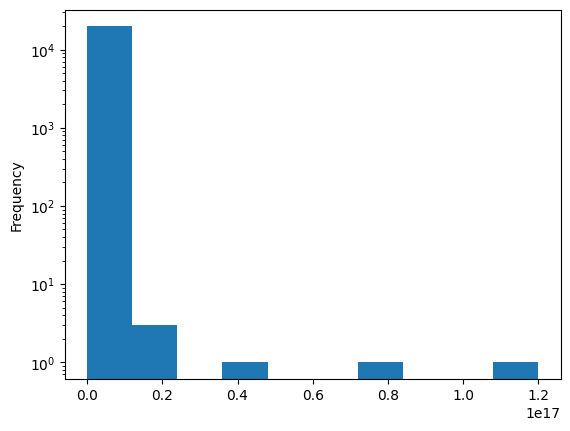

In [140]:
df_final["Gap"].plot(kind="hist",logy=True)

The thing that worries me is that by removing some sections of the data to use only stationary periods we created some artificially large gaps: gaps of order ~month. How many nanoseconds in a month? remove all gaps that are larger than about a month and see how the distribution looks (make another histogram).

In [141]:
length = len(df_final["Gap"])-1
for i in range(len(df_final["Gap"])):
  if df_final["Gap"].iloc[length-i]>=2069211000000000:
    df_final=df_final.drop([length-i])




In [142]:
len(df_final)

19849

<Axes: ylabel='Frequency'>

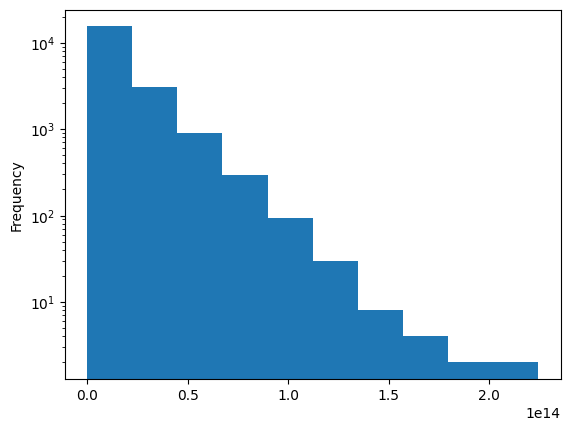

In [143]:
df_final["Gap"].plot(kind="hist",logy=True)

# data analysis

### important: the paper does not do it but I want you to formally choose a threshold before you do this test. Choose a p-value (=$\alpha$ thresold: call your variable ```alpha```) of 3-$\sigma$.

Follow the instructions (algorithm) in **Section 3 paragraph 3** and compare your results with the results in table 1 with a threshold  of = 0.01 and 0.001

Do it for all 5 magnitude thresholds as indicated in the paper (and in Table 1).

Note that the x axis in plot Fig 1 is in _log space_. Use ```np.log10()``` to take the logarithm of the time gaps.

The pseudocode for the algorithm is [here](https://github.com/fedhere/DSPS/blob/master/HW3/Corral2018_pseudocode.md).


Reproduce the paper Fig 1 and Table 1. In the Table report the size of each dataset after cleaning the value of the statistic and the p-value, as done in Corral 2018. Use the scipy function for the 2 sample KS test. (resources [here](https://colab.research.google.com/notebooks/markdown_guide.ipynb#scrollTo=70pYkR9LiOV0) to learn about the table syntax in markdown)

In [144]:
alpha = 0.997 #3 sigma (p = 0.003)



In [145]:

def gen_X_Mk(M_Lim,threshold):
  M_Truth = []
  for i in range(len(df_final["Magnitude"])):
    if df_final["Magnitude"].iloc[i]<M_Lim:
      M_Truth.append(False)
    else:
      M_Truth.append(True)
  x_Mk = df_final["Gap"][M_Truth]
  for i in [1,2]:
    mean = np.mean(x_Mk)
    Rk = 1/mean
    x_Mk = x_Mk*Rk
    T_Truth = []
    for i in range(len(x_Mk)):
      if x_Mk.iloc[i]<=threshold:
        T_Truth.append(False)
      else:
        T_Truth.append(True)
    x_Mk = x_Mk[T_Truth]
    mean = np.mean(x_Mk)
    x_Mk = x_Mk/mean
  return x_Mk

In [146]:
#Threshold 0.01 stuff
Mk_2=gen_X_Mk(2.0,0.01)
Mk_25 = gen_X_Mk(2.5,0.01)
Mk_3 = gen_X_Mk(3.0,0.01)
Mk_35 = gen_X_Mk(3.5,0.01)
Mk_4 = gen_X_Mk(4,0.01)

#Threshold 0.001 stuff
Mk_2_2=gen_X_Mk(2.0,0.001)
Mk_25_2 = gen_X_Mk(2.5,0.001)
Mk_3_2 = gen_X_Mk(3.0,0.001)
Mk_35_2 = gen_X_Mk(3.5,0.001)
Mk_4_2 = gen_X_Mk(4,0.001)

In [147]:
def gen_CDF(x,data):
  y = []
  for i in range(len(x)):
    count = 0
    for j in range(len(data)):
      if data[j] < x[i]:
        count = count+1
    y.append(count)
  y = np.asarray(y)/len(data)
  return y

In [148]:
x = np.logspace(-3,1,1000)

In [149]:
CDF_2 = gen_CDF(x,np.asarray(Mk_2))
CDF_25 = gen_CDF(x,np.asarray(Mk_25))
CDF_3 = gen_CDF(x,np.asarray(Mk_3))
CDF_35 = gen_CDF(x,np.asarray(Mk_35))
CDF_4 = gen_CDF(x,np.asarray(Mk_4))

CDF_2_2 = gen_CDF(x,np.asarray(Mk_2_2))
CDF_25_2 = gen_CDF(x,np.asarray(Mk_25_2))
CDF_3_2 = gen_CDF(x,np.asarray(Mk_3_2))
CDF_35_2 = gen_CDF(x,np.asarray(Mk_35_2))
CDF_4_2 = gen_CDF(x,np.asarray(Mk_4_2))


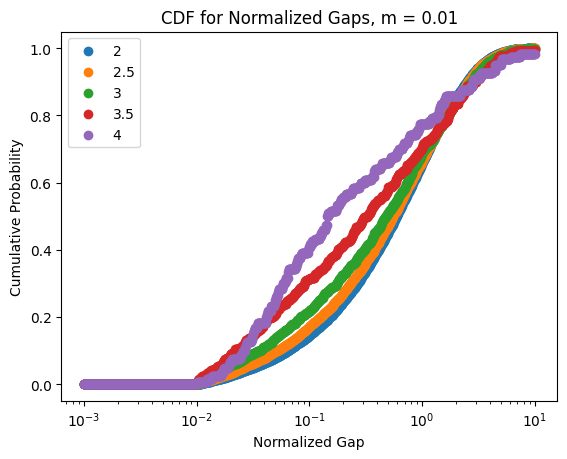

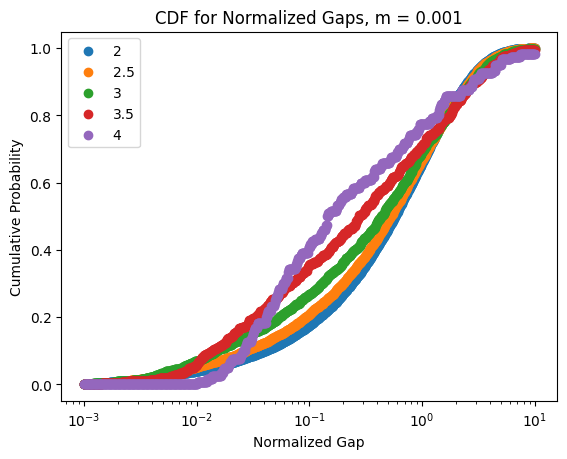

In [150]:
plt.scatter(x,CDF_2,label='2')
plt.scatter(x,CDF_25,label='2.5')
plt.scatter(x,CDF_3,label='3')
plt.scatter(x,CDF_35,label='3.5')
plt.scatter(x,CDF_4,label='4')
plt.xscale('log')
plt.xlabel("Normalized Gap")
plt.ylabel("Cumulative Probability")
plt.title("CDF for Normalized Gaps, m = 0.01")
plt.legend()
plt.show()

plt.scatter(x,CDF_2_2,label='2')
plt.scatter(x,CDF_25_2,label='2.5')
plt.scatter(x,CDF_3_2,label='3')
plt.scatter(x,CDF_35_2,label='3.5')
plt.scatter(x,CDF_4_2,label='4')
plt.xscale('log')
plt.xlabel("Normalized Gap")
plt.ylabel("Cumulative Probability")
plt.title("CDF for Normalized Gaps, m = 0.001")
plt.legend()
plt.show()

These are the CDFs for the m=0.01 and m=0.001 thresholds. We can compare these to Figure 1 of the Corral paper. The gaps between the individual CDFs (for different magnitude thresholds) are bigger than the Corral paper.

In [151]:
#Threshold 0.01. I use the CDFs as a way of normalizing it. Comapring with the graphs of the CDFs, the pvalues are good when the distributions look similar, so I think these values make sense.
Mks = [CDF_2,CDF_25,CDF_3,CDF_35,CDF_4]
Results = []
for i in range(len(Mks)):
  for j in range(len(Mks)):
    if j>i:
      Results.append([sp.stats.ks_2samp(Mks[i],Mks[j]),((i*0.5)+2),((j*0.5)+2)])

Results

[[KstestResult(statistic=0.027, pvalue=0.8595454206943325, statistic_location=0.09216857913383746, statistic_sign=1),
  2.0,
  2.5],
 [KstestResult(statistic=0.069, pvalue=0.017090148468768534, statistic_location=0.08016498334302787, statistic_sign=1),
  2.0,
  3.0],
 [KstestResult(statistic=0.135, pvalue=2.321597219050034e-08, statistic_location=0.1908941885675004, statistic_sign=1),
  2.0,
  3.5],
 [KstestResult(statistic=0.173, pvalue=1.753886116071003e-13, statistic_location=0.33969647295225003, statistic_sign=1),
  2.0,
  4.0],
 [KstestResult(statistic=0.047, pvalue=0.21939649929677082, statistic_location=0.1385893583171292, statistic_sign=1),
  2.5,
  3.0],
 [KstestResult(statistic=0.115, pvalue=3.528972349889754e-06, statistic_location=0.23227859289375993, statistic_sign=1),
  2.5,
  3.5],
 [KstestResult(statistic=0.162, pvalue=7.224279835989447e-12, statistic_location=0.3408166872900831, statistic_sign=1),
  2.5,
  4.0],
 [KstestResult(statistic=0.076, pvalue=0.0061856035701600

In [152]:
#Threshold 0.01, here I did it with the Mk values rather than the CDFs, but this was worse.
Mks = [Mk_2,Mk_25,Mk_3,Mk_35,Mk_4]
Results = []
for i in range(len(Mks)):
  for j in range(len(Mks)):
    if j>i:
      Results.append([sp.stats.ks_2samp(Mks[i],Mks[j]),((i*0.5)+2),((j*0.5)+2)])

Results

[[KstestResult(statistic=0.029902282144133985, pvalue=0.000813495124819666, statistic_location=0.16615611388018453, statistic_sign=-1),
  2.0,
  2.5],
 [KstestResult(statistic=0.08546941731468399, pvalue=6.585750427358645e-09, statistic_location=0.1358044702053962, statistic_sign=-1),
  2.0,
  3.0],
 [KstestResult(statistic=0.17561374210763991, pvalue=2.2815010809382365e-11, statistic_location=0.18063742428958196, statistic_sign=-1),
  2.0,
  3.5],
 [KstestResult(statistic=0.31514374350025565, pvalue=5.2772919966261766e-11, statistic_location=0.1542659320917238, statistic_sign=-1),
  2.0,
  4.0],
 [KstestResult(statistic=0.05902337836249744, pvalue=0.000662825821690728, statistic_location=0.19486405618148955, statistic_sign=-1),
  2.5,
  3.0],
 [KstestResult(statistic=0.1486272765833412, pvalue=6.914819331795768e-08, statistic_location=0.15667389455485733, statistic_sign=-1),
  2.5,
  3.5],
 [KstestResult(statistic=0.2895144658535148, pvalue=3.2479526897295305e-09, statistic_location=0

In [153]:
#Threshold 0.001 using CDFs
Mks2 = [CDF_2_2,CDF_25_2,CDF_3_2,CDF_35_2,CDF_4_2]
Results2 = []
for i in range(len(Mks2)):
  for j in range(len(Mks2)):
    if j>i:
      Results2.append([sp.stats.ks_2samp(Mks2[i],Mks2[j]),((i*0.5)+2),((j*0.5)+2)])

Results2

[[KstestResult(statistic=0.048, pvalue=0.19957365535779528, statistic_location=0.05868925636603429, statistic_sign=1),
  2.0,
  2.5],
 [KstestResult(statistic=0.111, pvalue=8.74452446093763e-06, statistic_location=0.1042406411687126, statistic_sign=1),
  2.0,
  3.0],
 [KstestResult(statistic=0.149, pvalue=4.2475154084352807e-10, statistic_location=0.2455615298772446, statistic_sign=1),
  2.0,
  3.5],
 [KstestResult(statistic=0.251, pvalue=4.564357804197157e-28, statistic_location=0.0, statistic_sign=-1),
  2.0,
  4.0],
 [KstestResult(statistic=0.071, pvalue=0.012912352230759101, statistic_location=0.12435146443514644, statistic_sign=1),
  2.5,
  3.0],
 [KstestResult(statistic=0.122, pvalue=6.669830320596686e-07, statistic_location=0.24769874476987447, statistic_sign=1),
  2.5,
  3.5],
 [KstestResult(statistic=0.248, pvalue=2.104700973377179e-27, statistic_location=0.0, statistic_sign=-1),
  2.5,
  4.0],
 [KstestResult(statistic=0.074, pvalue=0.008353146175741297, statistic_location=0.2

In [154]:
#Threshold 0.001, here using the Mk's rather than CDF
Mks2 = [Mk_2_2,Mk_25_2,Mk_3_2,Mk_35_2,Mk_4_2]
Results2 = []
for i in range(len(Mks2)):
  for j in range(len(Mks2)):
    if j>i:
      Results2.append([sp.stats.ks_2samp(Mks2[i],Mks2[j]),((i*0.5)+2),((j*0.5)+2)])

Results2

[[KstestResult(statistic=0.036060493509062486, pvalue=1.2902801103507533e-05, statistic_location=0.17982409449896072, statistic_sign=-1),
  2.0,
  2.5],
 [KstestResult(statistic=0.10128654526569317, pvalue=3.0482701096037744e-13, statistic_location=0.14636626627714394, statistic_sign=-1),
  2.0,
  3.0],
 [KstestResult(statistic=0.18109862684240166, pvalue=6.732868941900341e-13, statistic_location=0.10074382172815953, statistic_sign=-1),
  2.0,
  3.5],
 [KstestResult(statistic=0.2894381319536032, pvalue=2.5358554795063e-09, statistic_location=0.2000455554874617, statistic_sign=-1),
  2.0,
  4.0],
 [KstestResult(statistic=0.06680664253040519, pvalue=3.301061016626057e-05, statistic_location=0.14739596022342344, statistic_sign=-1),
  2.5,
  3.0],
 [KstestResult(statistic=0.14770724519961842, pvalue=2.5589433907502657e-08, statistic_location=0.09839078453774262, statistic_sign=-1),
  2.5,
  3.5],
 [KstestResult(statistic=0.2572454672245467, pvalue=2.3682081765891887e-07, statistic_location

In [155]:
print(len(Mk_2))
print(len(Mk_25))
print(len(Mk_3))
print(len(Mk_35))
print(len(Mk_4))

print('----')

print(len(Mk_2_2))
print(len(Mk_25_2))
print(len(Mk_3_2))
print(len(Mk_35_2))
print(len(Mk_4_2))

18911
5657
1432
413
120
----
19714
5975
1544
443
120


m=0.01 |N|M$\geq$2|M$\geq$2.5|M$\geq$3|M$\geq$3.5|M$\geq$4
--|--|-------|--------|-----|----|-------
M$\geq$2 | 18911 | - | 86.0% | 1.7% | 2.3*10$^{-6}$% | 0%
M$\geq$2.5 | 5657 | 0.027 | - | 21.9% | 3.5*10$^{-4}$% | 0%
M$\geq$3 | 1432 | 0.069 | 0.047 | - | 0.6% | 4.0*10$^{-6}$%
M$\geq$3.5 | 413 | 0.135 | 0.115 | 0.076 | - | 0.06%
M$\geq$4 | 120 | 0.173 | 0.162 | 0.133 | 0.09 | -
m=0.001
M$\geq$2 | 19714 | - | 20.0% | 8.7*10$^{-4}$% | 4.2*10$^{-8}$% | 0%
M$\geq$2.5 | 5975 | 0.048 | - | 1.2% | 6.6*10$^{-5}$% | 0%
M$\geq$3 | 1544 | 0.111 | 0.071 | - | 0.8% | 0%
M$\geq$3.5 | 443 | 0.149 | 0.122 | 0.074 | - | 0%
M$\geq$4 | 120 | 0.251 | 0.248 | 0.247 | 0.216 | -


Did you find any statistical significant differences between the distributions? What does it mean? Is your result identical to Correll's 2018? Why or why not? **Discuss!**

There are significant statistical differences between the distributions, especially M>3.5 and M>4. We can tell this is the case even just by looking at the CDFs, and it's backed up by the p values from the KS test. This means that we can reject the null hypothesis (that these all come from the same parent distribution), so our result is DIFFERENT than Corral's result (the scaling law doesn't hold!). Not sure if this is a data issue, or how I handled the data... a few people are having this issue but I'm not sure what's up exactly. It's hard to say because I feel like I am processing the data in the right way, and the resulting CDFs look realistic (they look normal, nothing like broken), but just not in agreement with Corral.

### "extra credits"

**How could you _force_ a significant result?**
Organize your result for different magnitude threshold in a numpy array (it should be a 5x5 array) for both cutoffs (0.01 and 0.001). Each of these arrays should contain the p-value for the pair of distributions i,j in cell \[i\]\[j\] and \[j\]\[i\]. Use ```imshow``` to visualize this 2D data. FIrst visualize the matrix itself as done below.

In [156]:
# your code here

pl.imshow((ks_001));
pl.axis('off')
cb = pl.colorbar()
cb.ax.set_ylabel(r'$p$-value')
pl.title("KS test results");
#add a caption

NameError: ignored


Now visualize the result as a matrix where the cells are white if the results is not statistically significant and red otherwise.
After doing it fot the set alpha threshold, lower your alpha threshold so that at least one pair of distribution has a statistically significant difference. **Warning!! this is an _unethical and horrifying practice_! Once you chose your significance threshold you are never allowed to change it! Why? Discuss**

Redoing it for threshold 0001